In [4]:
from keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("train image:", X_train.shape[0])
print("test image:", X_test.shape[0])

train image: 60000
test image: 10000


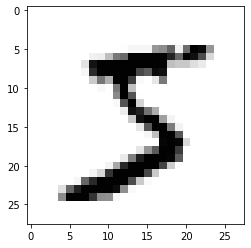

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 3 18 18 18 126 136 175 26 166 255 247 127 0 0 0 0 
0 0 0 0 0 0 0 0 30 36 94 154 170 253 253 253 253 253 225 172 253 242 195 64 0 0 0 0 
0 0 0 0 0 0 0 49 238 253 253 253 253 253 253 253 253 251 93 82 82 56 39 0 0 0 0 0 
0 0 0 0 0 0 0 18 219 253 253 253 253 253 198 182 247 241 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 80 156 107 253 253 205 11 0 43 154 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 14 1 154 253 90 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 139 253 190 2 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 11 190 253 70 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 35 241 225 160 108 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 81 240 253 253 119 25 0 0 0 0 0 0 0 0 0 


In [6]:
import matplotlib.pyplot as plt
import sys

plt.imshow(X_train[0], cmap="Greys")
plt.show()

for x in X_train[0]:
    for i in x:
        sys.stdout.write("%d " % i)
    sys.stdout.write("\n")

In [9]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense

import numpy
import tensorflow as tf

from keras.datasets import mnist

# 실행 시마다 같은 결과값 도출을 위한 시드 설정
numpy.random.seed(0)
tf.random.set_seed(0)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# 2개의 층, 512개의 뉴런 연결, 10개 클래스 출력 뉴런, 784개 픽셀 input 값, relu와 softmax 활성화 함수 이용
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 구조 설정
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# 모델 학습 테스트셋으로 검증, 200개씩 30번 학습
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200, verbose=2)

# 학습 정확도, 검증 정확도 출력
print('\naccuracy: {:.4f}'.format(model.evaluate(X_train, y_train)[1]))
print('\nval_accuracy: {:.4f}'.format(model.evaluate(X_test, y_test)[1]))

# 모델 저장
model.save('mnist_dl.h5')

Epoch 1/30
300/300 - 1s - loss: 0.3043 - accuracy: 0.9152 - val_loss: 0.1529 - val_accuracy: 0.9575
Epoch 2/30
300/300 - 1s - loss: 0.1262 - accuracy: 0.9635 - val_loss: 0.1053 - val_accuracy: 0.9688
Epoch 3/30
300/300 - 1s - loss: 0.0826 - accuracy: 0.9761 - val_loss: 0.0812 - val_accuracy: 0.9750
Epoch 4/30
300/300 - 1s - loss: 0.0597 - accuracy: 0.9828 - val_loss: 0.0753 - val_accuracy: 0.9767
Epoch 5/30
300/300 - 1s - loss: 0.0464 - accuracy: 0.9863 - val_loss: 0.0680 - val_accuracy: 0.9795
Epoch 6/30
300/300 - 1s - loss: 0.0350 - accuracy: 0.9899 - val_loss: 0.0684 - val_accuracy: 0.9785
Epoch 7/30
300/300 - 1s - loss: 0.0263 - accuracy: 0.9933 - val_loss: 0.0612 - val_accuracy: 0.9818
Epoch 8/30
300/300 - 1s - loss: 0.0205 - accuracy: 0.9949 - val_loss: 0.0637 - val_accuracy: 0.9806
Epoch 9/30
300/300 - 1s - loss: 0.0149 - accuracy: 0.9966 - val_loss: 0.0609 - val_accuracy: 0.9810
Epoch 10/30
300/300 - 1s - loss: 0.0127 - accuracy: 0.9972 - val_loss: 0.0636 - val_accuracy: 0.9811

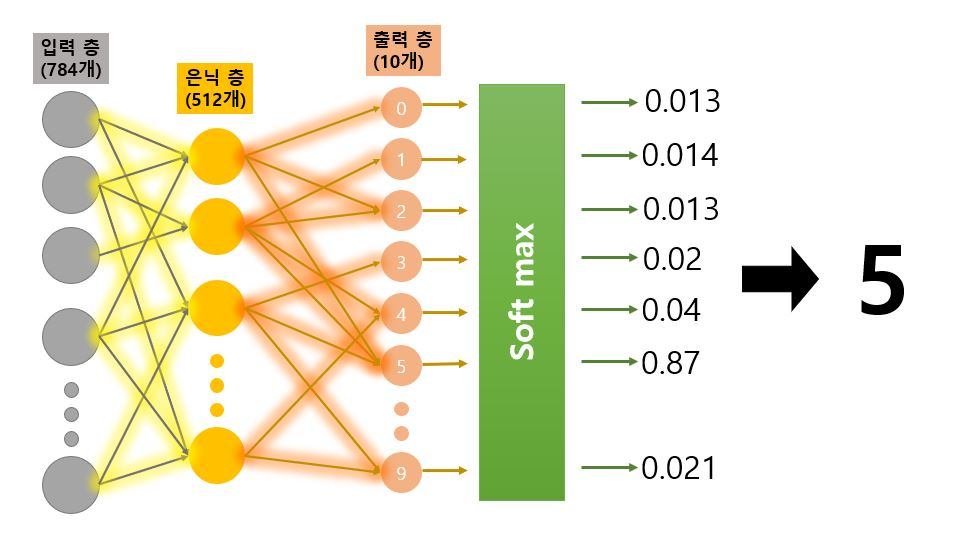

In [10]:
# 모델 신경망 시각화
from IPython.display import Image
Image("./모델신경망시각화.jpg")

In [11]:
from keras.models import load_model

from PIL import Image
import numpy as np

img = np.resize(Image.open("./test.png").convert("L"), (1, 784))

test_data = ((np.array(img) / 255) - 1) * -1

model = load_model("./mnist_dl.h5")

pred = model.predict_classes(test_data)

print(pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[3]
